# Test notebook for pastas with Pest Solver

In [1]:
from pathlib import Path
import pandas as pd

import pastas as ps
import pastas_plugins.pest as psp

%load_ext autoreload
%autoreload 2

In [2]:
head = (
    pd.read_csv("https://raw.githubusercontent.com/pastas/pastas/master/doc/examples/data/head_nb1.csv",index_col="date", parse_dates=True)
    .squeeze()
).iloc[-300:]
prec = (
    pd.read_csv("https://raw.githubusercontent.com/pastas/pastas/master/doc/examples/data/rain_nb1.csv", index_col="date", parse_dates=True)
    .squeeze()
)
evap = (
    pd.read_csv("https://raw.githubusercontent.com/pastas/pastas/master/doc/examples/data/evap_nb1.csv", index_col="date", parse_dates=True)
    .squeeze()
)
pex = (prec - evap).dropna()

In [3]:
# make sure to run this on the pastas dev branch

ml = ps.Model(head)
sm = ps.StressModel(
    pex, ps.Exponential(), name="pno", settings=ps.rcParams["timeseries"]["evap"]
)
ml.add_stressmodel(sm)
pest_path = Path("pestf")
solver = psp.PestGlmSolver(
    exe_name="bin/pestpp-glm", model_ws=pest_path / "model", temp_ws=pest_path / "temp", remove_existing=True
)
ml.solve(solver=solver, report=False)


2024-07-25 20:08:16.335714 starting: opening PstFrom.log for logging
2024-07-25 20:08:16.336077 starting PstFrom process
2024-07-25 20:08:16.336188 starting: setting up dirs
2024-07-25 20:08:16.336407 starting: removing existing new_d 'pestf/temp'
2024-07-25 20:08:16.350861 finished: removing existing new_d 'pestf/temp' took: 0:00:00.014454
2024-07-25 20:08:16.350986 starting: copying original_d 'pestf/model' to new_d 'pestf/temp'
2024-07-25 20:08:16.352056 finished: copying original_d 'pestf/model' to new_d 'pestf/temp' took: 0:00:00.001070
2024-07-25 20:08:16.352638 finished: setting up dirs took: 0:00:00.016450
2024-07-25 20:08:16.386371 transform was not passed, setting default tranform to 'log'
2024-07-25 20:08:16.386757 starting: adding grid type d style parameters for file(s) ['parameters_sel.csv']
2024-07-25 20:08:16.386985 starting: loading list-style pestf/temp/parameters_sel.csv
2024-07-25 20:08:16.387147 starting: reading list-style file: pestf/temp/parameters_sel.csv
2024-

<Axes: xlabel='date', ylabel='Head'>

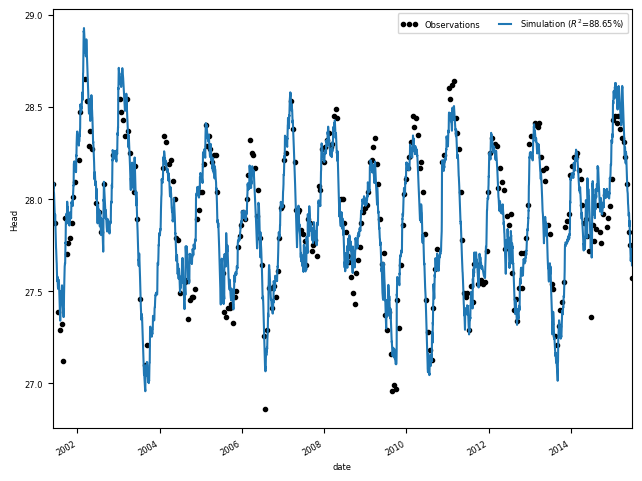

In [4]:
ml.plot()

In [5]:
ml.parameters

,initial,pmin,pmax,vary,name,dist,stderr,optimal
pno_A,215.674528,0.00001,21567.452806,True,pno,uniform,0.002147,854.6310
pno_a,10.000000,0.01000,1000.000000,True,pno,uniform,0.166463,178.0440
constant_d,27.902000,17.90200,37.902000,True,constant,uniform,0.150136,27.5071


[<Axes: xlabel='date', ylabel='Head'>,
 <Axes: xlabel='date'>,
 <Axes: title={'right': "Stresses: ['None']"}, xlabel='date', ylabel='Rise'>,
 <Axes: title={'center': 'Step response'}, xlabel='Time [days]'>,
 <Axes: title={'left': 'Model Parameters ($n_c$=3)'}>]

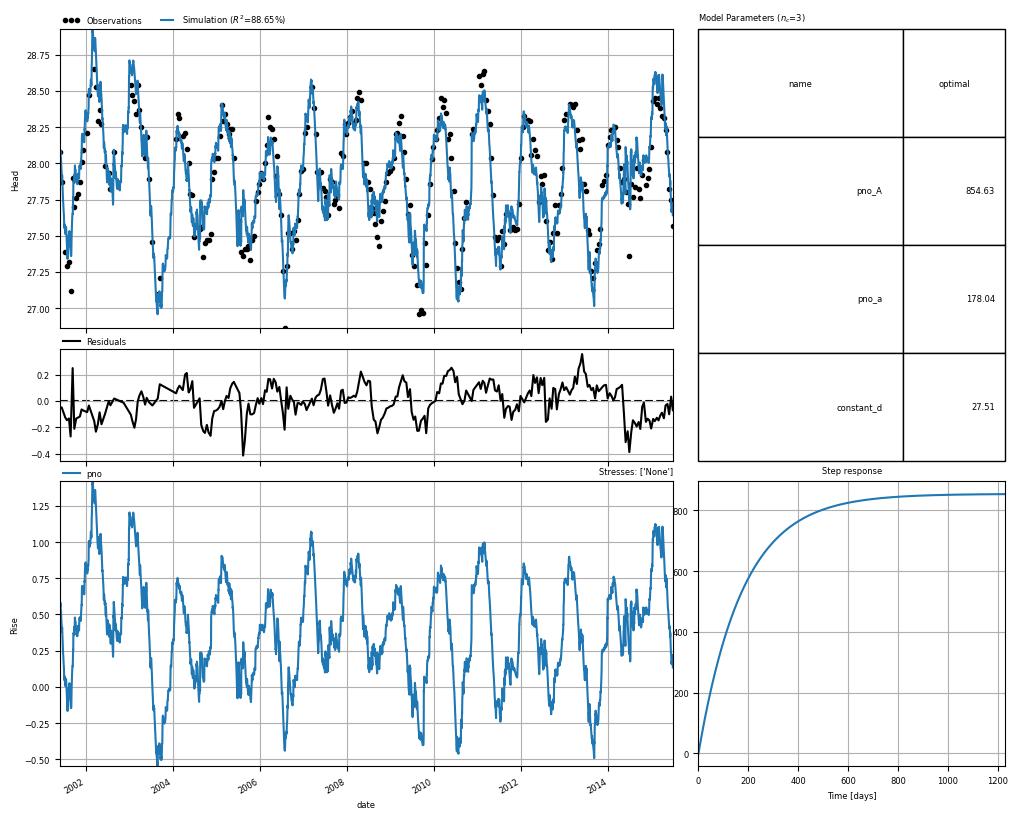

In [6]:
ml.plots.results()

In [7]:
ml.solver.pcov

,pno_A,pno_a,constant_d
pno_A,0.000005,-0.000278,-0.000291
pno_a,-0.000278,0.027710,0.022031
constant_d,-0.000291,0.022031,0.022541
